**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [96]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# import data 2C_weka.csv for 2 Class Classifcation.


In [6]:

df = pd.read_csv(r'C:\Users\Shruthi Mrinalan\Downloads\2Classdata.csv')
print(df)

     pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0           63.027818            22.552586              39.609117   
1           39.056951            10.060991              25.015378   
2           68.832021            22.218482              50.092194   
3           69.297008            24.652878              44.311238   
4           49.712859             9.652075              28.317406   
5           40.250200            13.921907              25.124950   
6           53.432928            15.864336              37.165934   
7           45.366754            10.755611              29.038349   
8           43.790190            13.533753              42.690814   
9           36.686353             5.010884              41.948751   
10          49.706610            13.040974              31.334500   
11          31.232387            17.715819              15.500000   
12          48.915551            19.964556              40.263794   
13          53.572170            2

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [8]:
df.head(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [7]:
df.tail(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


# Encode the Class variable to integer.

In [11]:
df['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [13]:
df['class'] = [1 if each == 'Abnormal' else 0 for each in df['class']]

In [14]:
df['class'] 

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
280    0
281    0
282    0
283    0
284    0
285    0
286    0
287    0
288    0
289    0
290    0
291    0
292    0
293    0
294    0
295    0
296    0
297    0
298    0
299    0
300    0
301    0
302    0
303    0
304    0
305    0
306    0
307    0
308    0
309    0
Name: class, Length: 310, dtype: int64

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [15]:
y = df['class']
x = df.drop(['class'], axis = 1)

In [18]:
x.shape

(310, 6)

In [19]:
y.shape

(310,)

# Normalize your Data (X) to get values between 0 to 1.

In [0]:
#x=x−min(x)max(x)−min(x)

In [21]:
x = (x - np.min(x))/(np.max(x) - np.min(x))
x

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173
5,0.136009,0.365744,0.099559,0.119943,0.647879,0.030933
6,0.263150,0.400439,0.207316,0.223960,0.542916,0.039680
7,0.185356,0.309190,0.134581,0.196592,0.507455,0.000890
8,0.170151,0.358811,0.256759,0.156294,0.590614,0.056674
9,0.101638,0.206581,0.250118,0.169425,0.152264,0.027287


# Split the dat as train and test with a ratio of 70:30.

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [51]:
from sklearn.neighbors import KNeighborsClassifier


In [64]:
# train test split
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier()
x,y = df.loc[:,df.columns != 'class'], df.loc[:,'class']
knn.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [65]:
prediction = knn.predict(x_test)
#print('Prediction: {}'.format(prediction))


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [66]:
print('With KNN (K=5) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=5) accuracy is:  0.8494623655913979


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

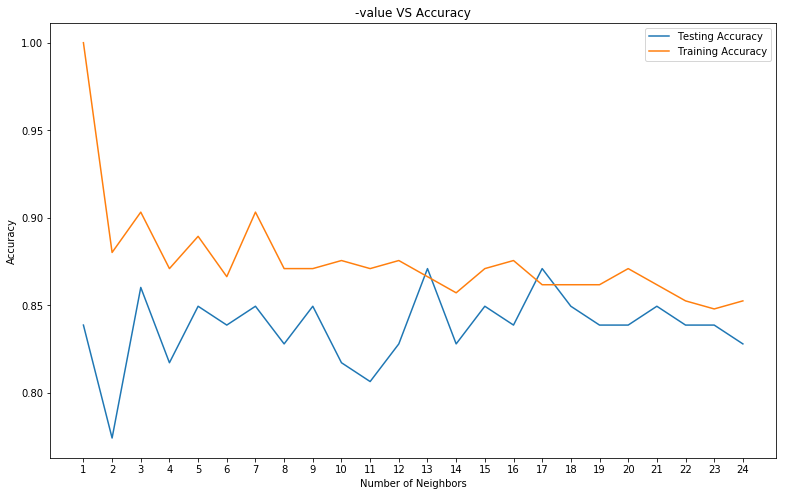

Best accuracy is 0.8709677419354839 with K = 13


In [70]:
# function to check the best fit for K from 1-25 range
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [92]:
df2 = pd.read_csv(r'C:\Users\Shruthi Mrinalan\Downloads\3Classdata.csv')
print(df2)
 

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027818    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
5           40.250200    13.921907              25.124950     26.328293   
6           53.432928    15.864336              37.165934     37.568592   
7           45.366754    10.755611              29.038349     34.611142   
8           43.790190    13.533753              42.690814     30.256437   
9           36.686353     5.010884              41.948751     31.675469   
10          49.706610    13.040974              31.334500     36.665635   
11          31.232387    17.715819              15.500000     13.516568   
12          48.915551    

In [93]:
df2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [83]:
df2.head(5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [84]:
df2.tail(5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [94]:
df2['class'].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

In [106]:
# in the previous dataset I have converted this to integer , I wanted to try Mukesh rao's approach with this one by classifying the column as category

df2["class"] = df2["class"].astype("category")

df2.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [107]:
df2.dtypes

pelvic_incidence             float64
pelvic_tilt                  float64
lumbar_lordosis_angle        float64
sacral_slope                 float64
pelvic_radius                float64
degree_spondylolisthesis     float64
class                       category
dtype: object

In [122]:
y1 = df2['class']
x1 = df2.drop(['class'], axis = 1)

In [123]:
x1.shape

(310, 6)

In [110]:
#x=x−min(x)max(x)−min(x)

In [124]:
x1 = (x1 - np.min(x1))/(np.max(x1) - np.min(x1))
x1

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173
5,0.136009,0.365744,0.099559,0.119943,0.647879,0.030933
6,0.263150,0.400439,0.207316,0.223960,0.542916,0.039680
7,0.185356,0.309190,0.134581,0.196592,0.507455,0.000890
8,0.170151,0.358811,0.256759,0.156294,0.590614,0.056674
9,0.101638,0.206581,0.250118,0.169425,0.152264,0.027287


In [125]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.3, random_state = 42)

In [126]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
# train test split
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier()
x1,y1 = df.loc[:,df.columns != 'class'], df.loc[:,'class']
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [128]:
prediction = knn.predict(x_test)
#print('Prediction: {}'.format(prediction))

In [129]:
print('With KNN (K=5) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=5) accuracy is:  0.7311827956989247


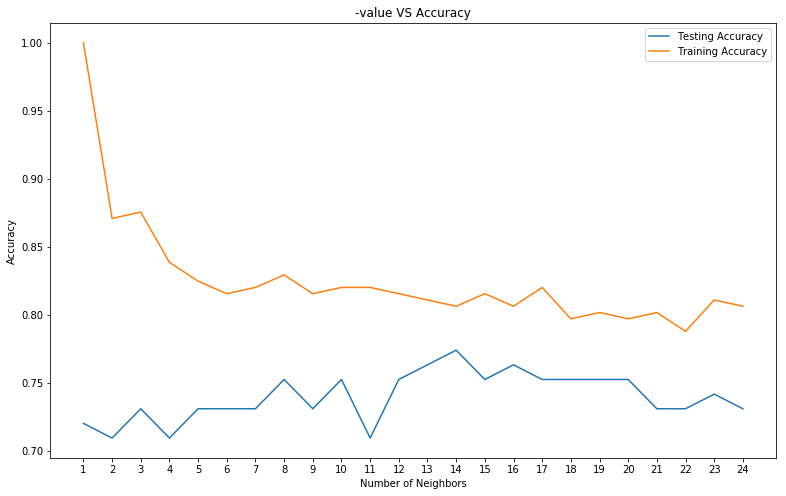

Best accuracy is 0.7741935483870968 with K = 14


In [130]:
# function to check the best fit for K from 1-25 range
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))